## Assignment: $k$ Means Clustering

## **Do two questions.**

`! git clone https://www.github.com/DS3001/kmc`

In [106]:
! git clone https://www.github.com/DS3001/kmc



fatal: destination path 'kmc' already exists and is not an empty directory.


**Q1.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

In [107]:
#imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [108]:
#load in the data
df = pd.read_csv('./kmc/data/airbnb_hw.csv')

df['price']= df['Price']
df['beds']= df['Beds']
df['n_reviews'] = df['Number Of Reviews']
df['score'] = df['Review Scores Rating']

In [109]:
x = df.loc[:,['price','beds','n_reviews','score']]
print(x.shape)

(30478, 4)


In [110]:
x.describe()

,beds,n_reviews,score
count,30393.000000,30478.000000,22155.000000
mean,1.530089,12.018735,91.993230
std,1.015359,21.980703,8.850373
min,0.000000,0.000000,20.000000
25%,1.000000,0.000000,89.000000
50%,1.000000,3.000000,94.000000
75%,2.000000,13.000000,100.000000
max,16.000000,257.000000,100.000000


In [111]:
#clean price
x['price'].value_counts()

X['price'] = X['price'].str.replace(',','')

x['price']= pd.to_numeric(x['price'], errors='coerce')

x.describe()

,price,beds,n_reviews,score
count,30297.000000,30393.000000,30478.000000,22155.000000
mean,153.357032,1.530089,12.018735,91.993230
std,108.895698,1.015359,21.980703,8.850373
min,10.000000,0.000000,0.000000,20.000000
25%,80.000000,1.000000,0.000000,89.000000
50%,125.000000,1.000000,3.000000,94.000000
75%,192.000000,2.000000,13.000000,100.000000
max,999.000000,16.000000,257.000000,100.000000


In [112]:
#clean beds
x['beds'] =  x['beds'].fillna(1)
x.describe()

,price,beds,n_reviews,score
count,30297.000000,30478.000000,30478.000000,22155.000000
mean,153.357032,1.528611,12.018735,91.993230
std,108.895698,1.014327,21.980703,8.850373
min,10.000000,0.000000,0.000000,20.000000
25%,80.000000,1.000000,0.000000,89.000000
50%,125.000000,1.000000,3.000000,94.000000
75%,192.000000,2.000000,13.000000,100.000000
max,999.000000,16.000000,257.000000,100.000000


In [113]:
#next, clean num of reviews
x['n_reviews'].describe()

#looks fine, dont need to clean it

count    30478.000000
mean        12.018735
std         21.980703
min          0.000000
25%          0.000000
50%          3.000000
75%         13.000000
max        257.000000
Name: n_reviews, dtype: float64

In [114]:
#last, clean reviews score rating

pd.crosstab(df['score'].isnull(), df['n_reviews'] > 0 )

n_reviews,False,True
score,,
False,0,22155
True,7814,509


In [115]:
# dropping the true 7,814 and 509 missing values for the sake of simplicity
x= x.dropna()
x.describe()

,price,beds,n_reviews,score
count,22104.000000,22104.000000,22104.000000,22104.000000
mean,150.827814,1.548860,16.521127,91.986699
std,100.263647,1.012773,24.327880,8.847351
min,10.000000,0.000000,1.000000,20.000000
25%,85.000000,1.000000,3.000000,89.000000
50%,125.000000,1.000000,7.000000,94.000000
75%,190.000000,2.000000,20.000000,100.000000
max,999.000000,16.000000,257.000000,100.000000


2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).


In [123]:
def maxmin(X): # Max-min scaler function
    X = (X-min(X))/(max(X)-min(X))
    return X

z= x.drop('price',axis=1)
z=z.apply(maxmin)

3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.


In [117]:
from sklearn.cluster import KMeans


In [124]:
#copied from notes
model = KMeans(n_clusters=6, max_iter=300, n_init = 10, random_state=0)
model = model.fit(z) # Initialize a kmc model
z['cluster']  = model.labels_

In [125]:

z.describe()


,beds,n_reviews,score,cluster
count,22104.000000,22104.000000,22104.000000,22104.000000
mean,0.096804,0.060629,0.899834,1.362695
std,0.063298,0.095031,0.110592,1.509104
min,0.000000,0.000000,0.000000,0.000000
25%,0.062500,0.007812,0.862500,0.000000
50%,0.062500,0.023438,0.925000,1.000000
75%,0.125000,0.074219,1.000000,2.000000
max,1.000000,1.000000,1.000000,5.000000


4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.


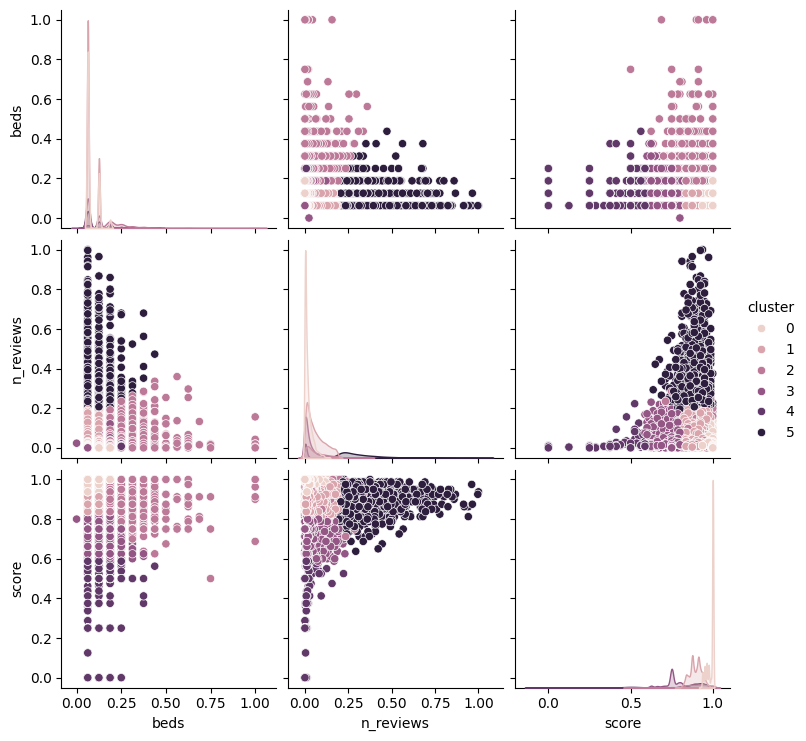

In [126]:

#use seaborn
sns.pairplot(data = z, hue= 'cluster')


5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?


In [127]:
x['cluster'] = model.labels_
x.loc[:,['price','cluster'] ].groupby('cluster').describe()


price                                                          
          count        mean         std   min    25%    50%    75%    max
cluster                                                                  
0        7825.0  151.682428   94.079702  10.0   85.0  130.0  195.0  985.0
1        7480.0  135.949733   75.865513  22.0   82.0  120.0  175.0  999.0
2        1736.0  268.998848  166.500720  27.0  150.0  225.0  350.0  997.0
3        2849.0  130.183573   83.291814  20.0   70.0  109.0  165.0  899.0
4         448.0  119.879464   85.368624  25.0   60.0   90.0  150.0  499.0
5        1766.0  135.049830   78.224213  27.0   85.0  119.5  170.0  875.0

The cluster that has the highest rental price is cluster 2 with about $270/night. Cluster 2 is pretty significantly more expensive than the others and the prices for the percentiles are all higher too. The second most expensive rental price is cluster 0 with about 150/night. Clusters 1,3,4, and 5 are all around the same at about 130 per night.

6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

Text(0.5, 1.0, 'Scree plot')

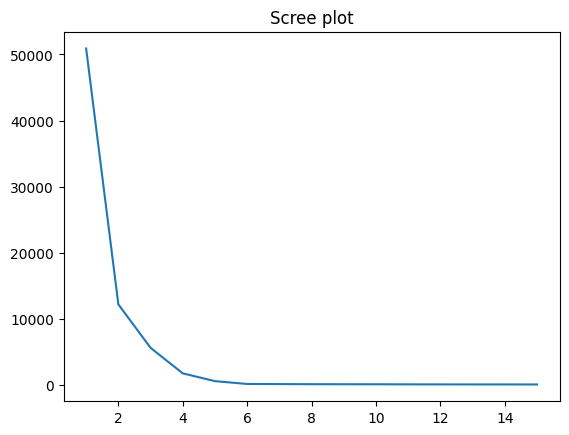

In [130]:
# Create a scree plot: (from notes)
k_bar = 15
k_grid = np.arange(1,k_bar+1) # The range of k's to consider
SSE = np.zeros(k_bar) # We'll store the training error here
for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
    model = model.fit(z) # Fit the emodel
    SSE[k] = model.inertia_ # Record the sum of squared error for k in the SSE vector

sns.lineplot(x=k_grid, y=SSE).set_title('Scree plot') # Create scree plot


I will pick 3 as k.

In [ ]:
model = KMeans(n_clusters=3, max_iter=300, n_init = 10, random_state=0)
model = model.fit(z) # Initialize a kmc model
z['cluster']  = model.labels_

sns.pairplot(data=z,hue='cluster')

x['cluster'] = model.labels_
x.loc[:,['price','cluster'] ].groupby('cluster').describe()

price                                                         
           count        mean         std   min   25%    50%    75%    max
cluster                                                                  
0         4860.0  173.930658  134.396955  20.0  80.0  135.0  216.0  997.0
1        15305.0  143.993401   86.020626  10.0  85.0  125.0  180.0  999.0
2         1939.0  146.867457   95.969226  27.0  85.0  125.0  179.0  875.0

**Q2.** This is a question about $k$ means clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$.
4. Explain the intuition of the elbow, using this numerical simulation as an example.

**Q3.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?